References:
[1] https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html
[2] https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html
[3] https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html
[4] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.round.html
[5] https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
[6] https://stackoverflow.com/questions/30228069/how-to-display-the-value-of-the-bar-on-each-bar-with-pyplot-barh
[7] https://seaborn.pydata.org/generated/seaborn.barplot.html
[8] https://seaborn.pydata.org/generated/seaborn.set_context.html
    

In [2]:
# import required libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('bmw.csv')
display(df)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,50.4,3.0
...,...,...,...,...,...,...,...,...
10776,X3,2016,19000,Automatic,40818,Diesel,54.3,2.0
10777,5 Series,2016,14600,Automatic,42947,Diesel,60.1,2.0
10778,3 Series,2017,13100,Manual,25468,Petrol,42.8,2.0
10779,1 Series,2014,9930,Automatic,45000,Diesel,64.2,2.0


In [40]:
#check for missing values, data types
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   mpg           10781 non-null  float64
 7   engineSize    10781 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 673.9+ KB


None

In [6]:
#count the number of unique values present in the "transmission" column
df['transmission'].value_counts()

Semi-Auto    4666
Automatic    3588
Manual       2527
Name: transmission, dtype: int64

In [42]:
#count the number of unique values present in the "Year" column
df['year'].value_counts()


2019    3485
2016    1882
2017    1721
2015     922
2018     848
2020     733
2014     501
2013     357
2012     119
2011      51
2010      41
2009      30
2008      23
2007      16
2006      14
2004      12
2002       6
2005       6
1999       4
2001       3
2000       2
2003       2
1998       1
1997       1
1996       1
Name: year, dtype: int64

In [7]:
len(df['year'].unique())

25

In [44]:
#count the number of unique values present in the "model" column
df['model'].value_counts()

 3 Series    2443
 1 Series    1969
 2 Series    1229
 5 Series    1056
 4 Series     995
 X1           804
 X3           551
 X5           468
 X2           288
 X4           179
 M4           125
 Z4           108
 6 Series     108
 X6           106
 7 Series     106
 X7            55
 i3            43
 8 Series      39
 M5            29
 M3            27
 M2            21
 i8            17
 M6             8
 Z3             7
Name: model, dtype: int64

In [17]:
#count the number of unique values present in the "fuelType" column
df['fuelType'].value_counts()

Diesel      7027
Petrol      3417
Hybrid       298
Other         36
Electric       3
Name: fuelType, dtype: int64

In [8]:
#find the percentage of unique values present in the fuelType column
fuelType_count = df['fuelType'].value_counts(normalize=True)*100
display(fuelType_count)

Diesel      65.179482
Petrol      31.694648
Hybrid       2.764122
Other        0.333921
Electric     0.027827
Name: fuelType, dtype: float64

In [9]:
print(type(fuelType_count))
#if there is only one column then it is called Series, but working with series is tough, so we will convert into dataframe

<class 'pandas.core.series.Series'>


In [19]:
#Find the percentage of unique values present in the 'fuelType' column

fuelType_count = df['fuelType'].value_counts(normalize=True)
#display(fuelType_count)
#print(type(fuelType_count))

fuelType_count = pd.DataFrame(fuelType_count)
#display(fuelType_count)

fuelType_count= fuelType_count.reset_index()
#display(fuelType_count)

fuelType_count=fuelType_count.rename(columns={"index":"fuelType", "fuelType":"% of cars"})
#display(fuelType_count)

fuelType_count['% of cars']=fuelType_count['% of cars']*100
#display(fuelType_count)


fuelType_count['% of cars'] = np.round(fuelType_count["% of cars"], 2)
display(fuelType_count)

#print(type(fuelType_count))

,fuelType,% of cars
0,Diesel,65.18
1,Petrol,31.69
2,Hybrid,2.76
3,Other,0.33
4,Electric,0.03


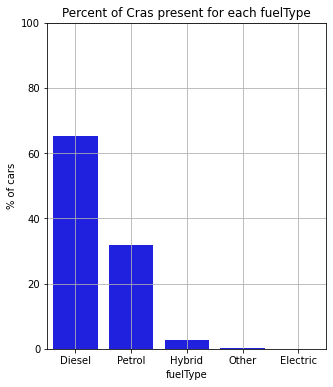

In [20]:
#BARPLOT for "fuelType" column
plt.figure(figsize=(5,6))

sns.barplot(x="fuelType",y="% of cars",data=fuelType_count, color='b')
plt.title("Percent of Cras present for each fuelType")

plt.yticks(np.arange(0,101,20))
plt.grid()
plt.show()


In [11]:
#Find the percentage of unique values present in the 'transmission' column

transmission_count = df['transmission'].value_counts(normalize=True)
#display(transmission_count)
#print(type(transmission_count))

transmission_count = pd.DataFrame(transmission_count)
#display(transmission_count)

transmission_count= transmission_count.reset_index()
#display(transmission_count)

transmission_count=transmission_count.rename(columns={"index":"tranmission", "transmission":"% of cars"})
#display(transmission_count)

transmission_count['% of cars']=transmission_count['% of cars']*100
#display(transmission_count)


transmission_count['% of cars'] = np.round(transmission_count["% of cars"], 2)
display(transmission_count)

#print(type(transmission_count))

,tranmission,% of cars
0,Semi-Auto,43.28
1,Automatic,33.28
2,Manual,23.44


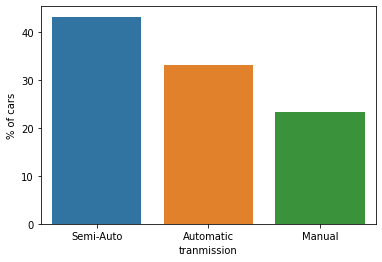

In [12]:
#create BARPLOT for 'transmission'
sns.barplot(x="tranmission", y='% of cars', data=transmission_count)
plt.show()

In [13]:
#Find "percentage" of unique values present in the model 


model_count = df['model'].value_counts(normalize=True)
#display(model_count)
#print(type(model_count))

model_count = pd.DataFrame(model_count)
#display(model_count)

model_count= model_count.reset_index()
#display(model_count)

model_count=model_count.rename(columns={"index":"model", "model":"% of cars"})
#display(model_count)

model_count['% of cars']=model_count['% of cars']*100
#display(model_count)


model_count['% of cars'] = np.round(model_count["% of cars"], 2)
display(model_count)

#print(type(model_count))

,model,% of cars
0,3 Series,22.66
1,1 Series,18.26
2,2 Series,11.40
3,5 Series,9.80
4,4 Series,9.23
5,X1,7.46
6,X3,5.11
7,X5,4.34
8,X2,2.67
9,X4,1.66


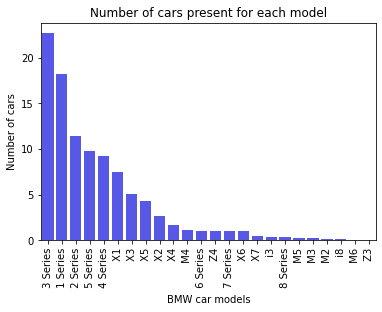

In [14]:
sns.barplot(x='model', y='% of cars', data=model_count, color='blue', alpha=0.75)
plt.title("Number of cars present for each model")
plt.xlabel("BMW car models")
plt.ylabel("Number of cars")
plt.xticks(rotation=90)
plt.show()

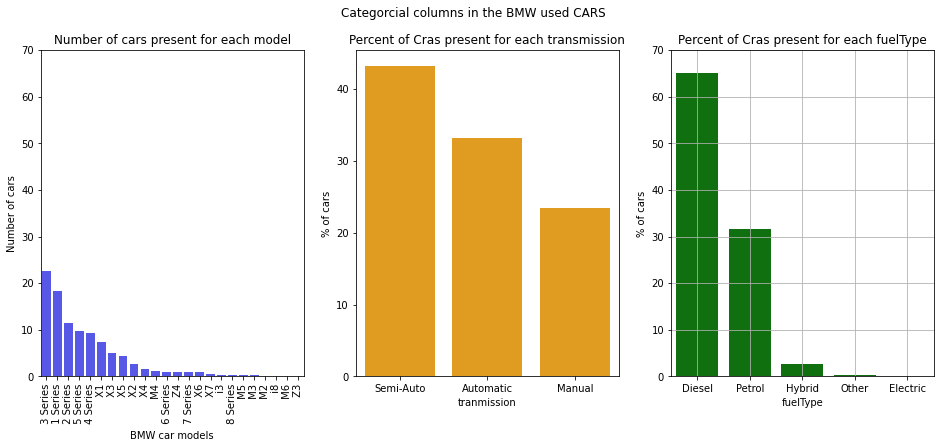

In [21]:
#plot the above barplots side by side
plt.figure(figsize=(16,6))

#For model column
plt.subplot(1,3,1)
sns.barplot(x='model', y='% of cars', data=model_count, color='blue', alpha=0.75)
plt.title("Number of cars present for each model")
plt.yticks(np.arange(0,71,10))
plt.xlabel("BMW car models")
plt.ylabel("Number of cars")
plt.xticks(rotation=90)

#for transmission
plt.subplot(1,3,2)
plt.yticks(np.arange(0,71,10))
plt.title("Percent of Cras present for each transmission")
sns.barplot(x="tranmission", y='% of cars', data=transmission_count, color="orange")

#for fueltype col
plt.subplot(1,3,3)
sns.barplot(x="fuelType",y="% of cars",data=fuelType_count, color='g')
plt.title("Percent of Cras present for each fuelType")
plt.yticks(np.arange(0,71,10))
plt.grid()

plt.suptitle("Categorcial columns in the BMW used CARS")
plt.show()

In [27]:
#Show Percentage via FUNCTION

def unique_percentage_count(data, col):
    
        col_count = data[col].value_counts(normalize=True)

        col_count = pd.DataFrame(col_count)
        col_count= col_count.reset_index()
        col_count=col_count.rename(columns={"index":col, col:"% of cars"})
        col_count['% of cars']=col_count['% of cars']*100
        col_count['% of cars'] = np.round(col_count["% of cars"], 2)
        return col_count
    
transmission_count= unique_percentage_count(df,"transmission")
#display(transmission_count)

model_count= unique_percentage_count(df,"model")
#display(model_count)

fuelType_count= unique_percentage_count(df,"fuelType")
#display(fuelType_count)

year_count= unique_percentage_count(df,"year")
year_count=year_count.sort_values(by="year")
display(year_count)

,year,% of cars
24,1996,0.01
23,1997,0.01
22,1998,0.01
18,1999,0.04
20,2000,0.02
19,2001,0.03
16,2002,0.06
21,2003,0.02
15,2004,0.11
17,2005,0.06


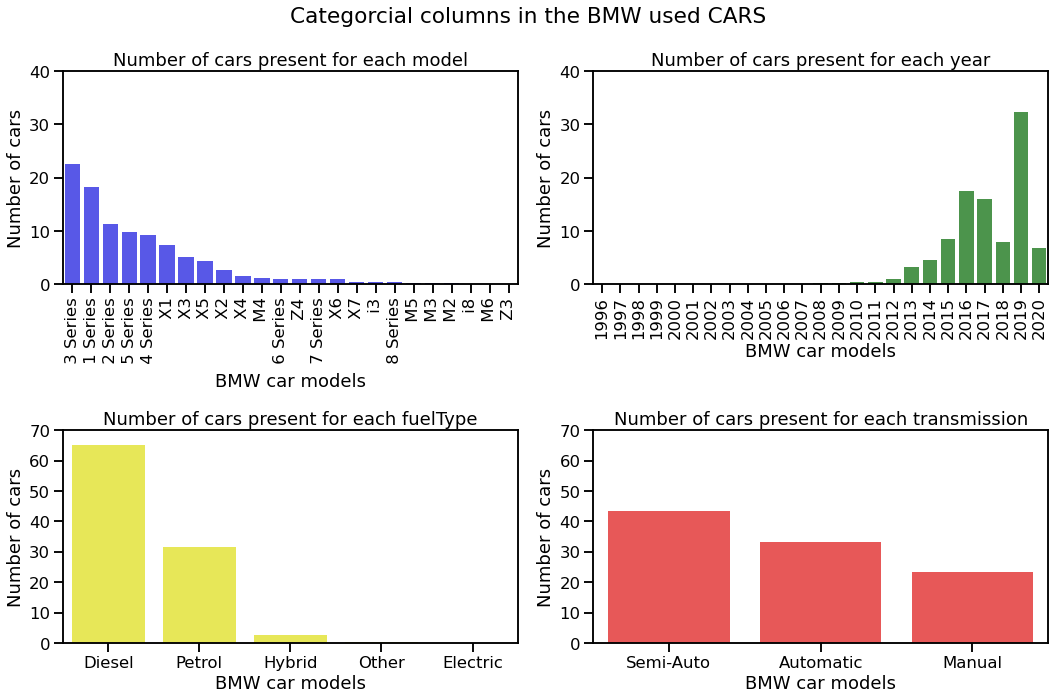

In [50]:
#Show Barplot via FUNCTION

sns.set_context("talk")
plt.figure(figsize=(15,10))
def barplot(data,x,y,c,yticks,r ):
    sns.barplot(x=x, y=y, data=data, color=c, alpha=0.75)
    plt.title("Number of cars present for each "+x)
    plt.yticks(yticks)
    plt.xlabel("BMW car models")
    plt.ylabel("Number of cars")
   



plt.subplot(2,2,1)
barplot(model_count, "model", "% of cars", "blue",np.arange(0,41,10), plt.xticks(rotation=90))

#for year col
plt.subplot(2,2,2)
barplot(year_count,"year", "% of cars", "green",np.arange(0,41,10), plt.xticks(rotation=90))

#for fueltype
plt.subplot(2,2,3)
barplot(fuelType_count, "fuelType", "% of cars", "yellow",np.arange(0,71,10),  plt.xticks(rotation=0))


#for transmission col
plt.subplot(2,2,4)
barplot(transmission_count, "transmission", "% of cars", "red", np.arange(0,71,10), plt.xticks(rotation=0))

plt.suptitle("Categorcial columns in the BMW used CARS")
plt.tight_layout()
plt.show()